# Predicting the age of abalone shellfish
## Support Vector Machines

To explore SVM classification, I generated SVC classifiers using the abalone data set to predict the 'ring' values. Support vector regression was also performed on the ring values (as a continous variable). The age of the abalone shellfish is directly related to the number of rings on its shell. Therefore, I am using other parameters such as its length and weight to predict the shellfishs' ages. 

The best performance with SVC classification was gained when the hyper parameters were optimized by using SkiKit learn's gridsearch, 

 precision    recall  f1-score   support

           0       0.95      0.85      0.90       893
           1       0.45      0.74      0.56       152

    accuracy                           0.83      1045
   macro avg       0.70      0.79      0.73      1045
weighted avg       0.88      0.83      0.85      1045

From the dataset description:
"The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem." 

https://archive.ics.uci.edu/ml/datasets/Abalone

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import svm, metrics


In [2]:
aba=pd.read_csv(r'https://raw.githubusercontent.com/Rylan-L/data_science/master/data_sets/Abalone.csv')

In [3]:
#We need a binary classification for our classifier (SVC), so we set ring values greater than 11 to 1, and those below
#equal to 1s
aba['Rings'][aba['Rings']<= 11] = 0

aba['Rings'][aba['Rings']> 11] = 1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [4]:
aba.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [5]:
#the sex columns are categorical, but we will one hot encode them
# Get one hot encoding of columns Sex
one_hot = pd.get_dummies(aba['Sex'])
# Drop column B as it is now encoded
aba = aba.drop('Sex',axis = 1)
# Join the encoded df
aba= aba.join(one_hot)

In [6]:
aba.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,0,1,0


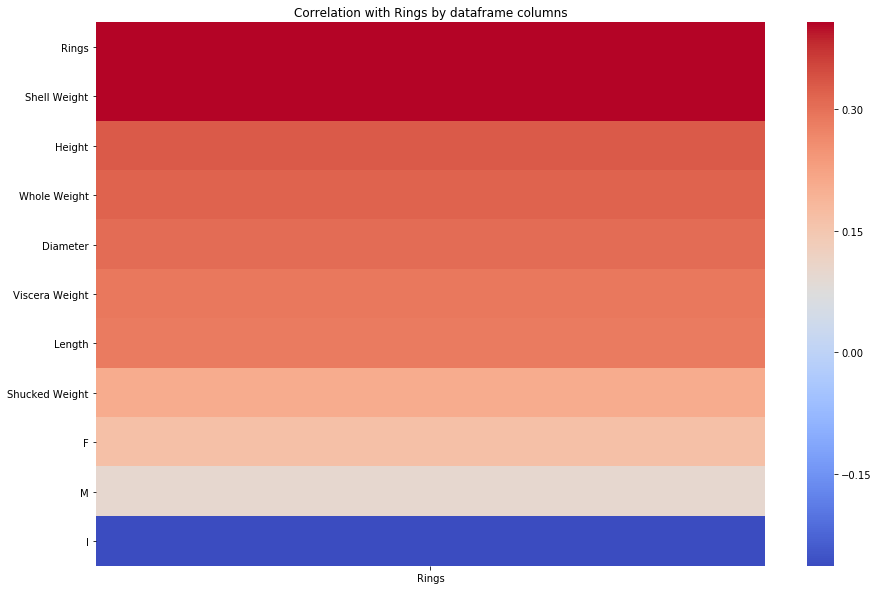

In [7]:
#perform an exploratory plot to see which attributes may be related to our target (rings)
def corr_heatmap_by_class(df,class_to_corr,dims = (15, 10),annotate=False):
    corr=df.corr()
    fig, ax = plt.subplots(figsize=dims)

    ordered=corr[[class_to_corr]].sort_values(by=[class_to_corr],ascending=False)
    vmax=float(ordered.iloc[[1]].values)
    ax.set_title('Correlation with ' + str(class_to_corr) + ' by dataframe columns')

    return(sns.heatmap(ordered,cmap='coolwarm',vmax=vmax,annot=annotate,ax=ax))

corr_heatmap_by_class(aba,class_to_corr='Rings')

In [8]:
#define the features and the target, split into training and test datas
features=list(aba.columns)
features.remove('Rings')

X=aba[features]
Y=aba['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)

# SVC with some guessed parameters

In [9]:
cost = .9 # penalty parameter of the error term
gamma = 'scale' # defines the influence of input vectors on the margins

In [10]:
from sklearn.metrics import classification_report

# Test a SVC with some guessed parameters
clf1 = svm.SVC(C=cost, max_iter=5000).fit(X_train, y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))

LinearSVC
             precision    recall  f1-score   support

          0       1.00      0.76      0.87      1036
          1       0.03      0.78      0.05         9

avg / total       0.99      0.76      0.86      1045



# SVC with optimized parameters from GridSearchSVC

In [11]:
from sklearn.model_selection import GridSearchCV
    
hyper_parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 5, 10], 'degree':[1,2,3], 'tol':[.001, .01, .1]}
svc = svm.SVC(gamma=0.001)
clf = GridSearchCV(svc, hyper_parameters, cv=4, iid = False, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 5, 10], 'degree': [1, 2, 3], 'tol': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.95      0.84      0.89       904
          1       0.41      0.74      0.53       141

avg / total       0.88      0.82      0.84      1045



In [13]:
clf.cv_results_['params'][9]

{'C': 1, 'degree': 2, 'kernel': 'linear', 'tol': 0.001}

# Support Vector Regression

Next we attempt support vector regression, however for this we need to conver the target attribute (Rings) back to its orginal form.

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score

In [15]:
#we have converted the target to binary, for regression we read hte data back in and keep it continous
aba2=pd.read_csv(r'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/Abalone.csv')

In [16]:
y_svr = aba2['Rings']
X_train_svr, X_test_svr, y_svr_train, y_svr_test = train_test_split(X, y_svr, test_size = 0.25, random_state=5)

In [17]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train_svr,y_svr_train)
svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_train_svr,y_svr_train)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1).fit(X_train_svr,y_svr_train)

In [18]:
print ('mean squared error')
print('SVR rbf ' + str(mean_squared_error(svr_rbf.predict(X_test_svr), y_svr_test)))
print('SVR lin ' + str(mean_squared_error(svr_lin.predict(X_test_svr), y_svr_test)))
print('SVR poly ' + str(mean_squared_error(svr_lin.predict(X_test_svr), y_svr_test)))

mean squared error
SVR rbf 4.808263269580323
SVR lin 5.18368313225168
SVR poly 5.18368313225168


In [19]:
print ('explained_variance_score')
print('SVR rbf ' + str(explained_variance_score(svr_rbf.predict(X_test_svr), y_svr_test)))
print('SVR lin ' + str(explained_variance_score(svr_lin.predict(X_test_svr), y_svr_test)))
print('SVR poly ' + str(explained_variance_score(svr_lin.predict(X_test_svr), y_svr_test)))

explained_variance_score
SVR rbf 0.06523475057811301
SVR lin 0.019640490634640462
SVR poly 0.019640490634640462


When using the support vector regression (SVR), the SVR with rbf Kernal performed the best of the kernals tried (mean squared error = 4.8, explained variance 0.06)